In [49]:
import numpy as np
import scipy as sp
import scipy.optimize as sp_opt
import matplotlib.pyplot as plt

def gaussian_function(x_input,location,std_dev,height):
    # Use the equation of a gaussian from Wikipedia:
    y_output = (((1 / std_dev * np.sqrt(2 * np.pi)) 
                 * np.exp(-0.5 * (x_input - (location/std_dev))**2))
                + height)
    return y_output

def generate_noisy_gaussian(location=0,std_dev=1,height=0,noise_domain=[-0.1,0.1],
                            x_domain=[-3,3],n_datapoints=10000):
    """
    Generate a gaussian with some aspect of noise.
    
    Input:
        location = centeral x value
        std_dev = standard deviation of the function
        height = height (y-off set) of the function
        noise_range = uniform random distribution of noise from perfect gauss function
        x_range = absolute domain of the gaussian function 
        n_datapoints = total number of input datapoints of gass function
    Output: x_values,y_values
        x_values = the x-axial array of the gaussian function within the domain
        y_values = the y-axial array of the gaussian function within the domain
    """
    
    # Make the x-axis value array given the domain and the number of points.
    x_values = np.linspace(x_domain[0],x_domain[-1],n_datapoints,dtype=float)
    
    # Generate the gaussian function and map to an output with the input parameters.
    y_values = gaussian_function(x_values,location,std_dev,height)
    
    # Generate an array of noise values equally distributed.
    noise_array = np.random.uniform(noise_domain[0],noise_domain[-1],n_datapoints)
    
    # Add the noise to the optimal gaussian function.
    y_values += noise_array
    
    return x_values,y_values

def fit_gaussian(x_values,y_values):
    """
    Fit a gaussian fucntion with 4 degrees of freedom.
    
    Input:
        x_values = the x-axial array of the values
        y_values = the y-axial array of the values
        
    Returns: fit_parameters[location,std_dev,height],covariance
        fit_parameters = an array containing the values of the fit
        location = the centeral value of the gaussian
        std_dev = the standard deviation of the gaussian
        height = the height of the gaussian function along the x-axis
        covariance = a convariance matrix of the fit
    """
    
    # Use scipy's curve optimization function for the gaussian function.
    fit_parameters,covariance = sp_opt.curve_fit(gaussian_function,x_values,y_values)
    
    return fit_parameters,covariance

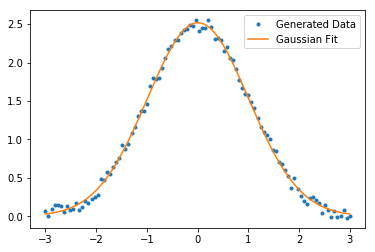

Central Location:   0.007803539565931603
Std dev:   0.996489648179349
Height:   0.0029929213796705397


In [50]:
# Define the number of data points.
n_datapoints=100

# Generate the noisy gaussian, use the default options execpt for the data points.
x_values,y_values = generate_noisy_gaussian(n_datapoints=n_datapoints)

# Generate a fit of the noisy gaussian data.
fit_parameters,covariance = fit_gaussian(x_values,y_values)

# Reassign the fit parameters, generate values to plot the gaussian function.
fit_location,fit_std_dev,fit_height = fit_parameters
fit_x_values = np.linspace(-3,3,n_datapoints*10)
fit_y_values = gaussian_function(fit_x_values,fit_location,fit_std_dev,fit_height)

# Plot the information of the generated gaussian data and the fit.
plt.plot(x_values,y_values,'.',label='Generated Data')
plt.plot(fit_x_values,fit_y_values,label='Gaussian Fit')
plt.legend()
plt.show()

# Print the values of the fitted parameters.
print('Central Location:  ',fit_parameters[0])
print('Std dev:  ',fit_parameters[1])
print('Height:  ',fit_parameters[2])